In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [4]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [5]:
## 数据加载
path = "G:/BigDataNote/testData/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df = pd.read_csv(path, header=None, names=names)

In [6]:
def parseRecord(record):
    result=[]
    r = zip(names,record)
    for name,v in r:
        if name == 'cla':
            if v == 'Iris-setosa':
                result.append(1)
            elif v == 'Iris-versicolor':
                result.append(2)
            elif v == 'Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result

In [7]:
### 1. 数据转换为数字以及分割
## 数据转换
datas = df.apply(lambda r: parseRecord(r), axis=1)
## 异常数据删除
datas = datas.dropna(how='any')
## 数据分割
X = datas[names[0:-1]]
Y = datas[names[-1]]
## 数据抽样(训练数据和测试数据分割)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [8]:
print "原始数据条数:%d；训练数据条数:%d；特征个数:%d；测试样本条数:%d" % (len(X), len(X_train), X_train.shape[1], X_test.shape[0])

原始数据条数:150；训练数据条数:90；特征个数:4；测试样本条数:60


In [9]:
### 2. 数据化处理
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [10]:
### 3. 特征选择(这里不进行特征选择操作)

In [11]:
### 4. 降维处理(这里不做降维处理)

In [12]:
### 5. 模型构建
lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='multinomial')
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         4.29193e-03,   5.428...     3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [18]:
### 6. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(Y_test,classes=(1,2,3))
print Y_test
print y_test_hot
## 得到预测的损失值
lr_y_score = lr.decision_function(X_test)
## 计算roc的值
lr_fpr, lr_tpr, lr_threasholds = metrics.roc_curve(y_test_hot.ravel(),lr_y_score.ravel())
## 计算auc的值
lr_auc = metrics.auc(lr_fpr, lr_tpr)
print "Logistic算法R值：", lr.score(X_train, Y_train)
print "Logistic算法AUC值：", lr_auc

114    3.0
62     2.0
33     1.0
107    3.0
7      1.0
100    3.0
40     1.0
86     2.0
76     2.0
71     2.0
134    3.0
51     2.0
73     2.0
54     2.0
63     2.0
37     1.0
78     2.0
90     2.0
45     1.0
16     1.0
121    3.0
66     2.0
24     1.0
8      1.0
126    3.0
22     1.0
44     1.0
97     2.0
93     2.0
26     1.0
137    3.0
84     2.0
27     1.0
127    3.0
132    3.0
59     2.0
18     1.0
83     2.0
61     2.0
92     2.0
112    3.0
2      1.0
141    3.0
43     1.0
10     1.0
60     2.0
116    3.0
144    3.0
119    3.0
108    3.0
69     2.0
135    3.0
56     2.0
80     2.0
123    3.0
133    3.0
106    3.0
146    3.0
50     2.0
147    3.0
Name: cla, dtype: float64
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]

In [19]:
### 7. 模型预测
lr_y_predict = lr.predict(X_test)

In [20]:
##### KNN算法实现
# a. 模型构建
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# b. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(Y_test,classes=(1,2,3))
## 得到预测的损失值
knn_y_score = knn.predict_proba(X_test)
## 计算roc的值
knn_fpr, knn_tpr, knn_threasholds = metrics.roc_curve(y_test_hot.ravel(),knn_y_score.ravel())
## 计算auc的值
knn_auc = metrics.auc(knn_fpr, knn_tpr)
print "KNN算法R值：", knn.score(X_train, Y_train)
print "KNN算法AUC值：", knn_auc

# c. 模型预测
knn_y_predict = knn.predict(X_test)

KNN算法R值： 0.977777777778
KNN算法AUC值： 0.969444444444


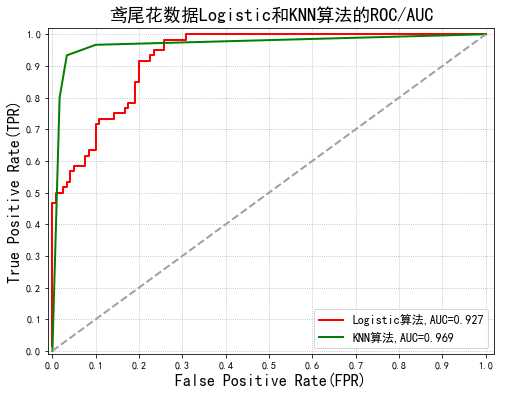

In [21]:
## 画图1：ROC曲线画图
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(lr_fpr,lr_tpr,c='r',lw=2,label=u'Logistic算法,AUC=%.3f' % lr_auc)
plt.plot(knn_fpr,knn_tpr,c='g',lw=2,label=u'KNN算法,AUC=%.3f' % knn_auc)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'鸢尾花数据Logistic和KNN算法的ROC/AUC', fontsize=18)
plt.show()

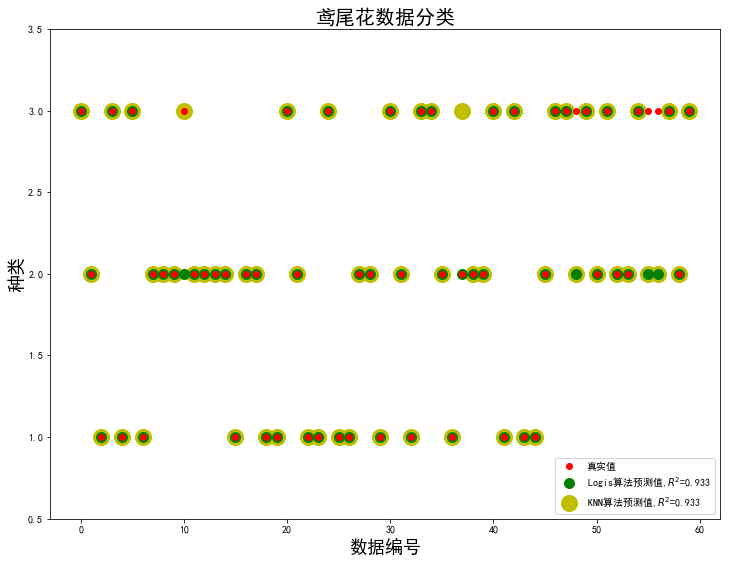

In [22]:
## 画图2：预测结果画图
x_test_len = range(len(X_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_test_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis算法预测值,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_test_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'种类', fontsize=18)
plt.title(u'鸢尾花数据分类', fontsize=20)
plt.show()
